In [839]:
import numpy as np  # NumPy package for arrays, random number generation, etc
import matplotlib.pyplot as plt  # For plotting
from shapely.geometry import Point
import pandas as pd
from sklearn.neighbors import KDTree

from faker import random_point_processes as rpp

(array([32.,  1.,  3.,  6.,  3.,  3.,  2.,  1.,  1.,  1.]),
 array([ 1. ,  5.6, 10.2, 14.8, 19.4, 24. , 28.6, 33.2, 37.8, 42.4, 47. ]),
 <a list of 10 Patch objects>)

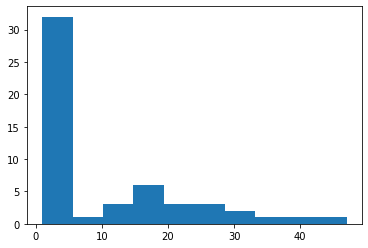

In [871]:
c = 1.2
n=100
a = np.random.zipf(c,n)
plt.hist(a[a<50])

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


[       2757          82           5          11           2          18
           1        4875           1           3          20       98105
          33 13670320672           1           1         147           1
           1           5        1469        1097           3         328
    17245794         206         151      207555           1          47
          22       30082         115         894         106           4
      968250          28         318           1      130511          17
        2576        1265           5           1          14          26
           1        8118           1           1           3         114
           1       28048           1           2           2          42
        1278          12          22          36         649           3
           2          16         699        3579          28          92
          10         139           1       27612        1082           1
           4     7562562          19     4261677   

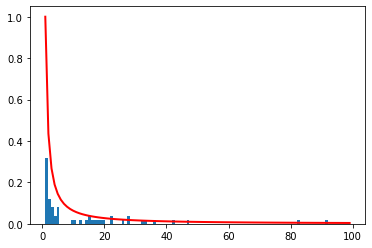

In [876]:
from scipy import special
limit = 100
count, bins, ignored = plt.hist(a[a<limit], limit, normed=True)
x = np.arange(1., limit)
y = x**(-c) / special.zetac(c)
plt.plot(x, y/max(y), linewidth=2, color='r')
print(a)
plt.show()

In [863]:
max(a)

1990025758

In [861]:
a

array([            79,             21,              3,          23796,
                  229,           8624,              2,              4,
               197526,              4,      870281705,              1,
                  273,            186,          42932,            266,
                   14,           4954,              1,           4692,
                   11,            167,            182,             27,
               871441,           8361,              1,              6,
                    1,             34,             44,             54,
                    2,              5,              1,              2,
                24782,              1,              1,              1,
                  173,              8,            852,           4057,
                27095,             19,             30,             15,
                    1,             40,            303,            166,
                   66,            652,              1,              4,
      

In [739]:
import logging
logging.basicConfig(level=logging.INFO)

DEBUG:root:Starting thomas cluster gen
DEBUG:root:Simulate Poisson point process for the parents
DEBUG:root:Starting random poisson point process
DEBUG:root:Simulate Poisson point process
DEBUG:root:Simulate Poisson point process for the daughters (from 102 centres)
DEBUG:root:Generate the (relative) locations in Cartesian coordinates 1020004
DEBUG:root:replicate parent points (ie centres of disks/clusters)


102 centres. 1020004 households.


(-111.17908510393798,
 1092.2085957745182,
 -88.94166689927043,
 1101.0697918981073)

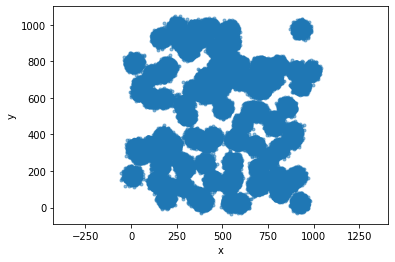

In [784]:
xx, yy, xx_parent_repeated, yy_parent_repeated, xx_parent, yy_parent, centre_ids = rpp.thomas_cluster_process(
    xmin = 0,
    xmax = 1000,
    ymin = 0,
    ymax = 1000,
    lambda_parent = .0001, # density of parent Poisson point process
    lambda_daughter = 10000, # mean number of points in each cluster
    sigma = 15 # sigma for normal variables (ie random locations) of daughters
)
print(len(xx_parent), 'centres.', len(xx), 'households.')
plt.scatter(xx, yy, alpha=0.5, marker='.')
plt.xlabel("x")
plt.ylabel("y")
plt.axis('equal')

In [786]:
pop_size = len(xx)
pop_size

1020004

In [787]:
def minmax(array):
    assert isinstance(array, np.ndarray)
    return (array - min(array)) / (max(array) - min(array))

In [788]:
# build some hidden features

In [789]:
pop_locs = [Point(x, y) for x, y in zip(xx,yy)]

In [790]:
pop_centres = [Point(x, y) for x, y in zip(xx_parent, yy_parent)]
centres = [Point(x, y) for x, y in zip(xx_parent_repeated, yy_parent_repeated)]

In [791]:
dist_to_centre = np.array([x.distance(y) for x, y in zip(pop_locs, centres)])

In [792]:
loc_array = np.vstack((xx, yy)).T
centre_array = np.vstack((xxParent, yyParent)).T

In [793]:
tree = KDTree(centre_array)

In [830]:
dist_closest_centre, _ = tree.query(loc_array, dualtree=True, k=1)
dist_closest_centre = dist_closest_centre.reshape(-1)
dist_closest_centre_mm = minmax(dist_closest_centre)
len(dist_closest_centre_mm)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


1020004

In [795]:
nearest_dist, _ = tree.query(loc_array, dualtree=True, k=3)
dist_closest_centres = nearest_dist.sum(axis=1)
dist_closest_centres_mm = minmax(dist_closest_centres)
len(dist_closest_centres_mm)

1020004

In [796]:
tree = KDTree(loc_array)
density = tree.query_radius(loc_array, count_only=True, r=1)
density_mm = minmax(density)
len(density_mm)

1020004

In [797]:
xx_mm = minmax(xx)
yy_mm = minmax(yy)
dist_to_centre_mm = minmax(dist_to_centre)
centre_ids_mm = minmax(centre_ids)

In [798]:
# build some attributes based on these hidden features and on each other

In [799]:
def get_gender(pman=.49, n=4):
    return np.random.choice([0, 1], size=n, p=[pman, 1-pman])

In [800]:
genders = get_gender(n=pop_size)

In [801]:
def get_ethnicity(xx, yy, density):
    p1 = np.random.poisson(xx*10)
    p2 = np.random.poisson(density*10)
    p3 = np.random.poisson(density*xx*10)
    p4 = np.random.poisson(((xx - .5)*10)**2)
    p5 = np.random.poisson(yy*10)
    choice = np.array([p1,p2,p3,p4,p5])
    choice = choice/sum(choice)
    return np.random.choice([1,2,3,4,5], p=choice)
    

In [802]:
ethnicity = np.array([get_ethnicity(x,y,d) for x,y,d in zip(xx_mm, yy_mm, density)])

In [803]:
def get_hh_people(ethnicity, density):
    p1 = density*50 + ethnicity*2
    p2 = density*40 + ethnicity*4
    p3 = density*30 + ethnicity*6
    p4 = density*20 + ethnicity*8
    p5 = density*10 + ethnicity*10
    choice = np.array([p1,p2,p3,p4,p5])
    choice = choice/sum(choice)
    return np.random.choice([1,2,3,4,5], p=choice)

In [804]:
hh_people = np.array([get_hh_people(e,d) for e,d in zip(ethnicity, density)])

In [805]:
def get_age(centre_id, density, dist_closest_centre):
    old = 70
    adult = 30 + (12*centre_id)
    child = 20 - (12*centre_id)
    return np.random.choice(
        [
            int(np.random.poisson(old)),
            int(np.random.poisson(adult)),
            int(np.random.poisson(child))
        ],
        p=(.3-(density*dist_closest_centre/5),.3,.4+(density*dist_closest_centre/5))
    )

In [806]:
age = np.array([get_age(c,d,dist) for c,d,dist in zip(centre_ids_mm, density_mm, dist_closest_centre_mm)])

In [831]:
def get_dist_pt(dist_closest_centre):
    return np.random.normal(1-dist_closest_centre)**2

In [832]:
dist_pt = np.array([get_dist_pt(d) for d in dist_closest_centre])

In [809]:
def get_income(dist_closest_centres):
    return (15 + np.random.poisson(5*(dist_closest_centres+1))*5)*1000

In [810]:
income = np.array([get_income(d) for d in dist_closest_centres_mm])

In [816]:
income_mm = minmax(income)

In [818]:
def get_car(ethnicity, income_mm, density_mm):
    p = income_mm * (1 - density_mm)
    if ethnicity < 3:
        p /=2 
    choice = np.array([p, 1-p])
    return np.random.choice([1, 0], p=choice)

In [820]:
has_car = np.array([get_car(e, i, d) for e, i, d in zip(ethnicity, income_mm, density_mm)])

In [ ]:
# build df

In [833]:
data_dict =  {
        'x': xx,
        'y': yy,
        'centre_id': centre_ids,
        'dist_centre': dist_to_centre,
        'density': density,
        'gender': genders,
        'ethnicity': ethnicity,
        'hh_people': hh_people,
        'age': age,
        'dist_pt': dist_pt,
        'income': income,
        'has_car': has_car
    }

In [834]:
for k,v in data_dict.items():
    print(k, len(v))

x 1020004
y 1020004
centre_id 1020004
dist_centre 1020004
density 1020004
gender 1020004
ethnicity 1020004
hh_people 1020004
age 1020004
dist_pt 1020004
income 1020004
has_car 1020004


In [835]:
data = pd.DataFrame(data_dict)

In [836]:
data.head()

,x,y,centre_id,dist_centre,density,gender,ethnicity,hh_people,age,dist_pt,income,has_car
0,535.071881,952.859788,0,19.126535,12,0,2,2,36,0.739358,45000,0
1,546.972366,995.682667,0,25.321996,9,0,2,3,22,2.669353,40000,0
2,556.785626,980.505114,0,19.159516,12,0,2,4,69,3.185707,45000,1
3,543.035664,944.165281,0,27.361781,11,1,2,2,22,2.422186,25000,0
4,536.530146,971.336653,0,3.423286,21,1,2,2,18,1.978793,50000,0


In [838]:
data.to_csv('data.csv', index=False)

In [885]:
xx = np.array([1,2,3,4,1])
yy = np.array([1,2,3,4,4])

In [886]:
left = xx < 3
bottom = yy < 3

In [891]:
# bottom left
xx[left & ~bottom]

array([1])

In [892]:
yy[left & ~bottom]

array([4])